### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

/home/sai/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/sai/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/sai/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/sai/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
train_data = pd.read_csv('LoanP_train.csv')
test_data = pd.read_csv('LoanP_test.csv')

In [31]:
#Shape of the data
train_data.shape

(614, 13)

In [6]:
#Getting the head of the data
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
#Knowing abt the train_data df
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
#Basic Stats abt data
train_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [15]:
#Missing Value Analysis
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [27]:
#Calculate the Percentage of Missing Values...Based on percentage, if percentage>30%, we go for imputation
missing_df = pd.DataFrame({'Variable':train_data.columns, 'Missing Value Count': list(train_data.isnull().sum())})

In [28]:
missing_df.head()

,Variable,Missing Value Count
0,Loan_ID,0
1,Gender,13
2,Married,3
3,Dependents,15
4,Education,0


In [32]:
missing_df['Missing Percentage'] = [(value/train_data.shape[0])*100 for value in missing_df['Missing Value Count']]

In [34]:
missing_df

,Variable,Missing Value Count,Missing Percentage
0,Loan_ID,0,0.000000
1,Gender,13,2.117264
2,Married,3,0.488599
3,Dependents,15,2.442997
4,Education,0,0.000000
5,Self_Employed,32,5.211726
6,ApplicantIncome,0,0.000000
7,CoapplicantIncome,0,0.000000
8,LoanAmount,22,3.583062
9,Loan_Amount_Term,14,2.280130


In [36]:
#Missing percentage is < 30%. So, we can remove the missing value rows
new_df = train_data.dropna(axis=0)

In [38]:
new_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [39]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
Loan_ID              480 non-null object
Gender               480 non-null object
Married              480 non-null object
Dependents           480 non-null object
Education            480 non-null object
Self_Employed        480 non-null object
ApplicantIncome      480 non-null int64
CoapplicantIncome    480 non-null float64
LoanAmount           480 non-null float64
Loan_Amount_Term     480 non-null float64
Credit_History       480 non-null float64
Property_Area        480 non-null object
Loan_Status          480 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 52.5+ KB


In [40]:
#Now, convert object columns to int(Not all...)

In [42]:
#Making Male=0, Female=1
new_df['Gender'] = new_df['Gender'].map({'Male':0, 'Female':1})

/home/sai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [46]:
#new_df['Married'].unique()
#Making Married as Yes-1, No-0
new_df['Married'] = new_df['Married'].map({'Yes':1, 'No':0})

/home/sai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [48]:
#new_df['Dependents'].unique()
#Making '1'-1, '0'-0, '2'-2, '3+'-3
new_df['Dependents'] = new_df['Dependents'].map({'1':1, '0':0, '2':2, '3+':3})

/home/sai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [51]:
#new_df['Education'].unique()
#Making Graduate-1, Not Graduate-0
new_df['Education'] = new_df['Education'].map({'Graduate':1, 'Not Graduate':0})

/home/sai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [52]:
#new_df['Self_Employed'].unique()
new_df['Self_Employed'] = new_df['Self_Employed'].map({'Yes':1, 'No':0})

/home/sai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [55]:
#new_df['Property_Area'].unique()
#Making Rural-0, Urban-1, Semiurban-2
new_df['Property_Area'] = new_df['Property_Area'].map({'Rural':0, 'Urban':1, 'Semiurban':2})

/home/sai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [57]:
#new_df['Loan_Status'].unique()
#Making N-0, Y-1
new_df['Loan_Status'] = new_df['Loan_Status'].map({'Y':1, 'N':0})

/home/sai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [58]:
#Now, check the data info
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 13 columns):
Loan_ID              480 non-null object
Gender               480 non-null int64
Married              480 non-null int64
Dependents           480 non-null int64
Education            480 non-null int64
Self_Employed        480 non-null int64
ApplicantIncome      480 non-null int64
CoapplicantIncome    480 non-null float64
LoanAmount           480 non-null float64
Loan_Amount_Term     480 non-null float64
Credit_History       480 non-null float64
Property_Area        480 non-null int64
Loan_Status          480 non-null int64
dtypes: float64(4), int64(8), object(1)
memory usage: 52.5+ KB


### Exploratory Data Analysis

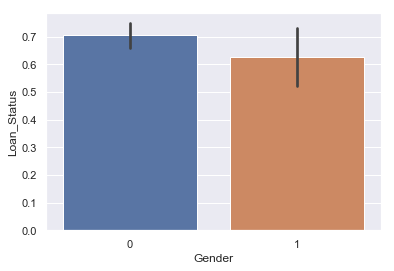

In [59]:
#Gender vs Loan_Status
sns.barplot(x='Gender', y='Loan_Status', data=new_df)

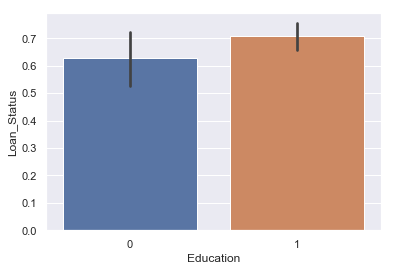

In [60]:
#Education vs Loan_Status
sns.barplot(x='Education', y='Loan_Status', data=new_df)

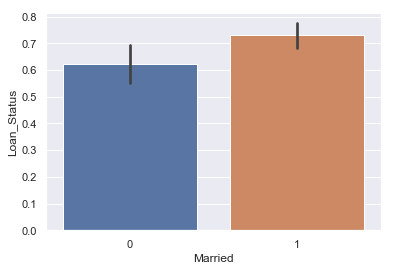

In [61]:
#Married vs Loan_Status
sns.barplot(x='Married', y='Loan_Status', data=new_df)

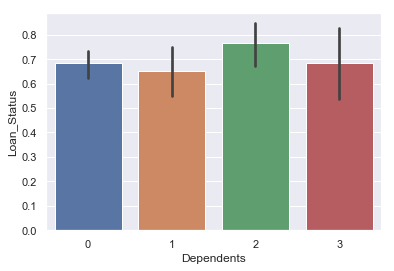

In [62]:
#Dependents vs Loan_Status
sns.barplot(x='Dependents', y='Loan_Status', data=new_df)

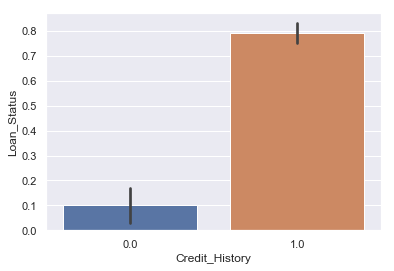

In [65]:
#Credit History vs Loan_Status
sns.barplot(x='Credit_History', y='Loan_Status', data=new_df)

In [1]:
#Checking for Normality in Response Variable(Loan_Status)